<a href="https://colab.research.google.com/github/alicevadney/DS3001-assignments/blob/main/Probability_and_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

A die is fair if every face is equally likely. A die has six sides if it has six faces labeled 1, 2, ... , 6.

1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

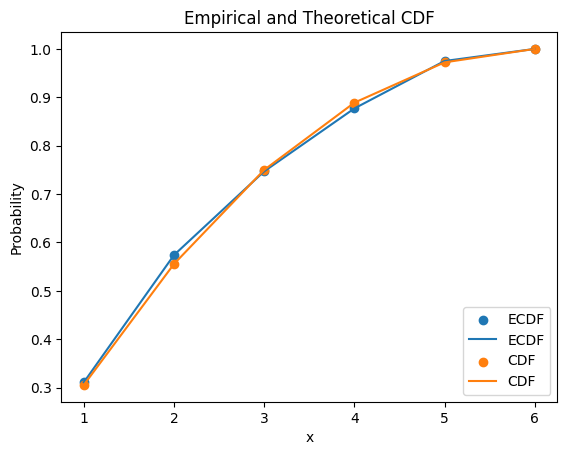

In [20]:
sides = np.array([1, 2, 3, 4, 5, 6])

# explicit calculation
pdf = np.zeros_like(sides, dtype=float)
for i in range(len(sides)):
    for j in range(len(sides)):
        pdf[min(sides[i], sides[j]) - 1] += 1
pdf /= 36
cdf = np.cumsum(pdf)

# bootstrap
N = 1000
d1 = np.random.choice(sides, size=N)
d2 = np.random.choice(sides, size=N)
min_roll = np.minimum(d1, d2)

ecdf = np.array([(min_roll <= side).mean() for side in sides])

# plot cdf for both
plt.scatter(sides,ecdf,label='ECDF')
plt.plot(sides,ecdf,label='ECDF')
plt.scatter(sides,cdf,label='CDF')
plt.plot(sides,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

2.

Expected value:  3.5243


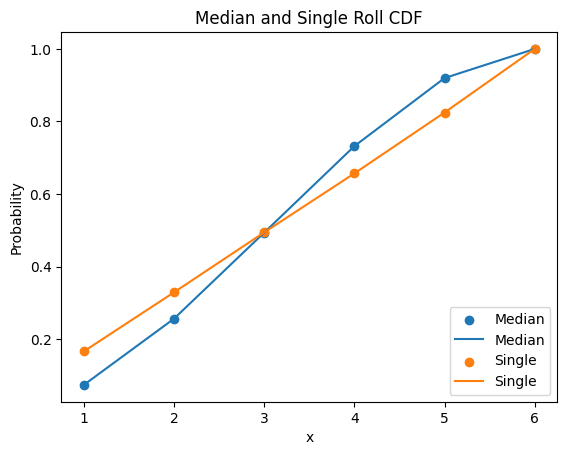

In [23]:
# number of simulation rounds
N = 10000
sides = np.array([1, 2, 3, 4, 5, 6])

# three dice and compute the median
d1 = np.random.choice(sides, size=N)
d2 = np.random.choice(sides, size=N)
d3 = np.random.choice(sides, size=N)
R_med = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

# expected value
expected_value = np.sum(R_med)/N
print('Expected value: ', expected_value)

# ECDF for the median and single dice
ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( R_med <= sides[i] )
    single[i] = (1/N)*np.sum( d1 <= sides[i] )

expected_value = np.sum(R_med)/N

# comparison
plt.scatter(sides,ecdf,label='Median')
plt.plot(sides,ecdf,label='Median')

plt.scatter(sides,single,label='Single')
plt.plot(sides,single,label='Single')

plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

3.

                  0
count  10000.000000
mean       4.169600
std        3.279438
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       37.000000


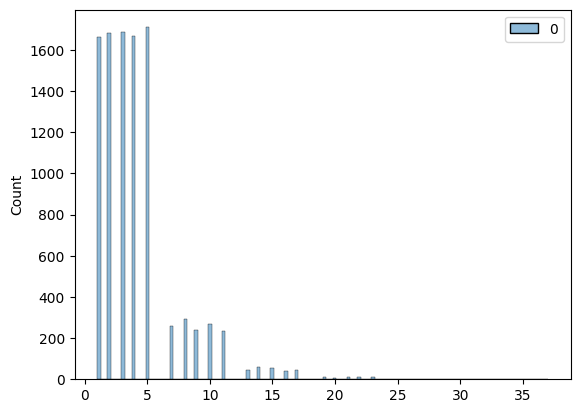

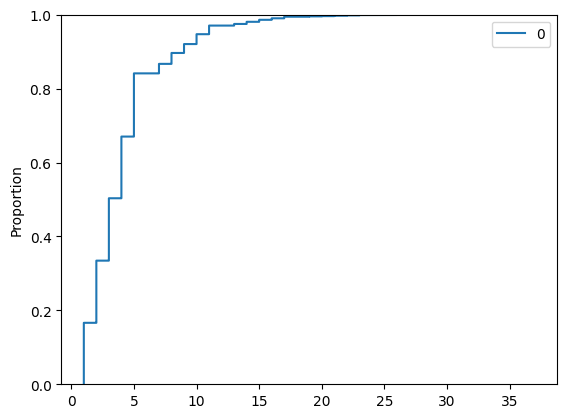

In [25]:
# number of simulation rounds
N = 10000
sides = np.array([1, 2, 3, 4, 5, 6])

results = []
for n in range(N):
    total = 0
    while True:
        roll = np.random.choice(sides)
        total += roll
        if roll < 6:  # stop when the roll is less than 6
            results.append(total)
            break

results = pd.DataFrame(results)

print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

# Question 2

In [8]:
df = pd.read_csv('./sample_data/mammogram.csv')

1.

In [12]:
print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')

# difference of mammogram and control survival rates
survival_diff = 44425/(44425+500) - 44405/(44405+505)
print('Difference in Survival Rates: ', survival_diff)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

Difference in Survival Rates:  0.00011505110015985753


2.

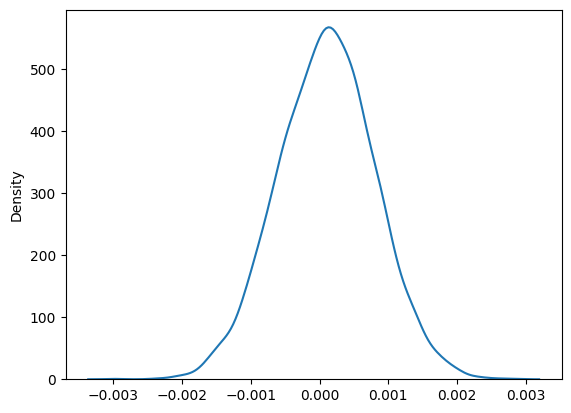

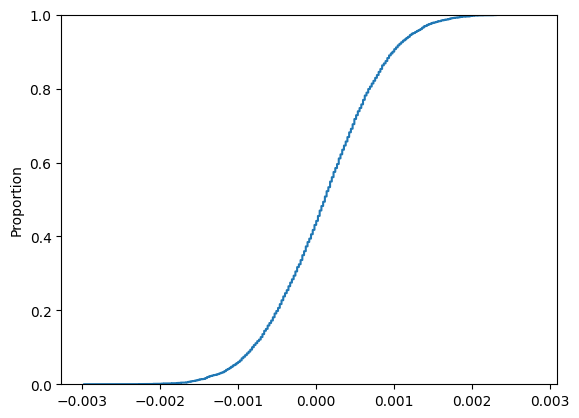

In [19]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_mammogram = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for s in range(S):
    df_mammogram_s = df_mammogram.sample( df_mammogram.shape[0], axis=0, replace=True)
    df_control_s = df_control.sample( df_control.shape[0], axis=0, replace=True)
    treatment_effect_s = np.mean(df_mammogram_s['survive']) - np.mean(df_control_s['survive'])
    fx.append(treatment_effect_s)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

3.

In [17]:
confidence = .99

# bounds
lower = np.quantile(fx, .005 )
upper = np.quantile(fx, .995)

print('(', lower, ', ', upper, ')' )

( -0.001799473924662458 ,  0.0019186273493007908 )


The confidence interval includes zero, implying that there is not necessarily a significant difference in 25 year survival rates between mammograms and more traditional cancer screening methods.

4.

Since the confidence interval includes zero, the data suggests that getting a mammogram does not lead to a significant difference in 25 year survival rates. This is not necessarily a result that should be taken seriously in considering the useage of mammograms.

To know a bit more about how these results came to be, I would want to know if the mammograms were truly randomly assigned to a sample that is representative of the overall population. Another important factor is the potential existence of outside factors that contribute to the existence of breast cancer and can affect the 25-year survival rates.

Lastly, mammograms might be more helpful than the data implies if we consider other impacts of breast cancer. If the mammogram is better at catching breast cancer earlier, other factors, such as length of treatment, might be significantly improved by the mammogram over traditional screening methods.